# Euler on 1d SDE
## General 1d SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sde_v01 import Sde_1d, Gbm_1d

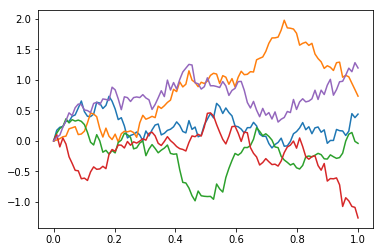

In [3]:
'''=============
test SDE_1d.euler
plot paths
=============='''
sde1 = Sde_1d(init_state=0., drift=lambda x:0, vol=lambda x:1.) #By default, it is std bm
grid = np.linspace(0,1,100)

plt.figure()    
for i in range(5):
    xh = sde1.euler(grid)
    plt.plot(grid, xh)

## Geometric Brownian motion

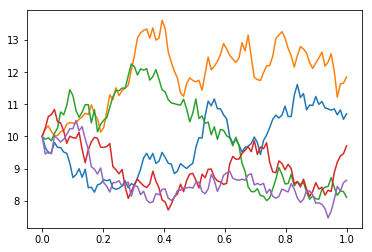

In [4]:
'''============
test:
    plot Gbm paths
=============='''
gbm1 = Gbm_1d(init_state=10., drift_ratio=.03, vol_ratio=.25)
grid = np.linspace(0,1,100)

plt.figure()
for i in range(5):
    xh = gbm1.euler(grid)
    plt.plot(grid, xh)

## Euler method for option price

We implement ordinary MC to find BSM call price, compare with exact price, see [bsm_formula](./bsm_formula.ipynb)

In [5]:
from contract_v01 import VanillaOption

In [6]:
#initiate option and sde instances
option1 = VanillaOption(otype = 1, strike = 110., maturity= 1., market_price=15.) 
option2 = VanillaOption(otype = -1, strike = 110., maturity= 1., market_price=15.) 
gbm1 = Gbm_1d(init_state=100., drift_ratio=.0475, vol_ratio=.2)
maturity = option1.maturity

In [7]:
print('>>>>>>>>>> Exact call value is ' + str(gbm1.bsm_price(option1)))
print('>>>>>>>>>> Exact put value is ' + str(gbm1.bsm_price(option2)))  

>>>>>>>>>> Exact call value is 5.943273183452838
>>>>>>>>>> Exact put value is 10.84042522804176


In [8]:
'''==========
Terminal price based on Gbm Euler path
=========='''

r = gbm1.drift(1)

num_step = 10
time_grid = np.linspace(0, maturity, num_step+1)

num_path = 10000
terminal_price = [gbm1.euler(time_grid)[-1]  for i in range(num_path)]



In [9]:
'''===========
compute call price
============'''
payoff = [option1.payoff(s) for s in terminal_price]
call_value = np.exp(-r*maturity)*np.average(payoff)
print('call price is ' + str(call_value))

call price is 5.82266968503122


In [10]:
'''===========
compute put price
============'''
payoff = [option2.payoff(s) for s in terminal_price]
put_value = np.exp(-r*maturity)*np.average(payoff)
print('put price is ' + str(put_value))

put price is 10.54895493421287
